In [3]:
%load_ext autoreload
%autoreload 2

import igraph as ig
from igraph import Graph
from test_environment import *
from environment_presets import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx

from environment import RoadEnvironment
from shock import Shock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
D = np.array([# Action 0: do-nothing
                [0.9, 0.1, 0.0, 0.0],
                [0.0, 0.9, 0.1, 0.0],
                [0.0, 0.0, 0.9, 0.1],
                [0.0, 0.0, 0.0, 1.0]
            ])

In [157]:
shift = np.diag(np.diag(D, k=1), k=1)

In [68]:
standard_dict = {'lambda_t': 1/50,
                 'beta_m': 2.3,
                 'm_min': 5,
                 'm_max': 8, 
                 'theta': np.array([0.24, 0.45, 0.9]),
                 'sigma': 0.64,
                 'max_timesteps': 50,
}

S = Shock(**standard_dict)

In [69]:
S.loc_based_det_table_transform(magn=5, det_table=np.ones((5,5)), dist=np.array([3, 4]), pga_dict={}, fragility_dict={})

shift [[ 1.  1.  1.  1.  1.]
 [nan  1.  1.  1.  1.]
 [nan nan  1.  1.  1.]
 [nan nan nan  1.  1.]
 [nan nan nan nan  1.]]


TypeError: Shock.get_pga_from_distances() got multiple values for argument 'magn'

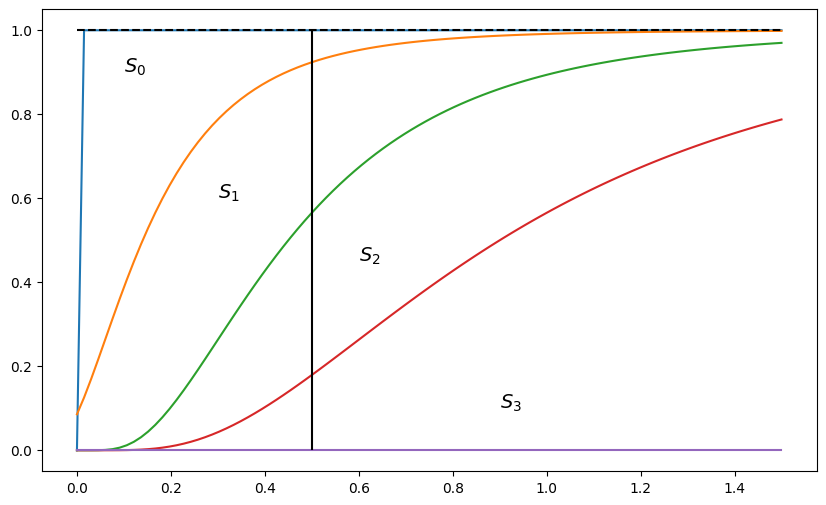

In [88]:
x = np.linspace(0,1.5,100)
y = np.zeros((len(x), 5))
plt.figure(figsize=(10,6))
for i, k in enumerate(x):
    y[i,:] = S.get_fragility_values(pga=k, theta_mat=[1e-6, 0.24, 0.45, 0.9, 1000], sigma=0.64, shift=[0, -0.1, 0, 0, 0])
for j in range(y.shape[1]):
    plt.plot(x, y[:,j])
plt.text(x=0.1, y=0.9, s=r"$S_0$", fontsize=14)
plt.text(x=0.3, y=0.6, s=r"$S_1$", fontsize=14)
plt.text(x=0.6, y=0.45, s=r"$S_2$", fontsize=14)
plt.text(x=0.9, y=0.1, s=r"$S_3$", fontsize=14)
plt.vlines(x=0.5, ymin=0, ymax=1, color='black')
plt.hlines(y=1, xmin=np.min(x), xmax=np.max(x), linestyles='dashed', color='k')
plt.show()


In [158]:
mat = S.get_theta_mat_from_vec(theta_vec=S.theta)

In [159]:
mat

array([[0.24, 0.45, 0.9 ],
       [0.  , 0.24, 0.9 ],
       [0.  , 0.  , 0.24],
       [0.  , 0.  , 0.  ]])

In [ ]:
np.concatenate()

In [103]:
S.theta

array([0.24, 0.45, 0.9 ])

In [104]:
S.sigma

AttributeError: 'Shock' object has no attribute 'sigma'

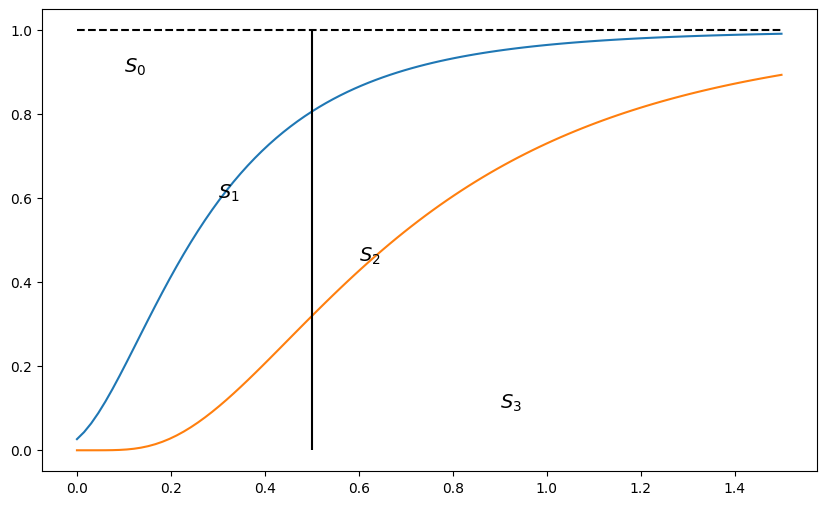

In [80]:
y2 = np.zeros((len(x), 2))
plt.figure(figsize=(10,6))
for i, k in enumerate(x):
    y2[i,:] = S.get_fragility_values(pga=k, theta_mat=[(0.24+0.45)/2, (0.45+0.9)/2], sigma=0.64, shift=[-0.1, 0])
for j in range(y2.shape[1]):
    plt.plot(x, y2[:,j])
plt.text(x=0.1, y=0.9, s=r"$S_0$", fontsize=14)
plt.text(x=0.3, y=0.6, s=r"$S_1$", fontsize=14)
plt.text(x=0.6, y=0.45, s=r"$S_2$", fontsize=14)
plt.text(x=0.9, y=0.1, s=r"$S_3$", fontsize=14)
plt.vlines(x=0.5, ymin=0, ymax=1, color='black')
plt.hlines(y=1, xmin=np.min(x), xmax=np.max(x), linestyles='dashed', color='k')
plt.show()


(array([2.20356567e+00, 1.99335555e+00, 1.76177212e+00, 1.60769633e+00,
        1.46160618e+00, 1.34182164e+00, 1.23871300e+00, 1.09097874e+00,
        9.81528557e-01, 9.33145000e-01, 8.32385070e-01, 7.34208727e-01,
        6.60224162e-01, 6.33213924e-01, 5.32923737e-01, 5.08966830e-01,
        4.54006868e-01, 4.22064326e-01, 3.92705371e-01, 3.41033612e-01,
        3.18485935e-01, 2.74330068e-01, 2.59768027e-01, 2.30174201e-01,
        2.09740369e-01, 1.95413199e-01, 1.78032698e-01, 1.43976311e-01,
        1.33641960e-01, 1.29649142e-01, 1.13208127e-01, 1.06631722e-01,
        9.72368563e-02, 9.27742953e-02, 7.44543079e-02, 7.44543079e-02,
        6.76430305e-02, 6.08317531e-02, 5.63691921e-02, 5.35507325e-02,
        4.67394551e-02, 4.15722791e-02, 3.85189479e-02, 3.35866436e-02,
        3.12379273e-02, 2.37220350e-02, 2.53661364e-02, 2.46615215e-02,
        1.92594740e-02, 1.76153725e-02, 1.62061427e-02, 1.36225547e-02,
        1.55015278e-02, 1.31528115e-02, 9.39486534e-03, 1.127383

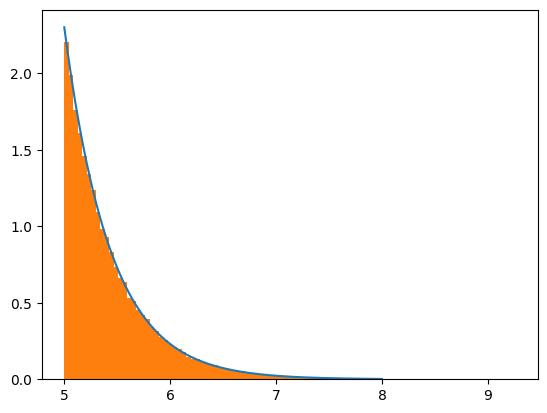

In [37]:
m = np.linspace(S.m_min,S.m_max,1000)
plt.figure()
plt.plot(m, S.beta_m*np.exp(-S.beta_m*(m-S.m_min))/(1-np.exp(-S.beta_m*(S.m_max-S.m_min))))
plt.hist(S.get_shock_magnitude(beta_m=S.beta_m, size=int(1e5)), bins=100, density=True)

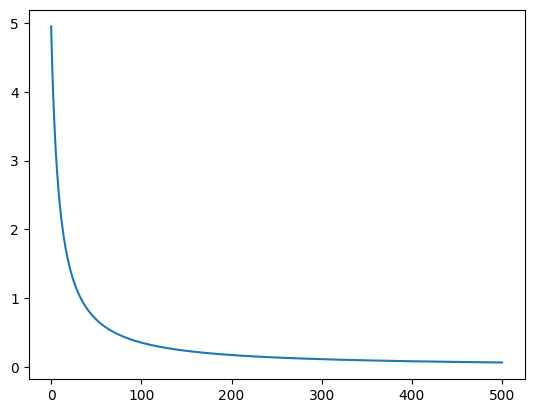

In [42]:
c0 = -0.868
c1 = 0.5
c2 = -1.1
c3 = 10
m = np.linspace(5, 10, 1000)

pga = lambda m, r: c0 + c1*m + c2*np.log(r+c3)

r = np.linspace(0,500,1000)

plt.figure()
plt.plot(r, np.exp(pga(m=10, r=r))

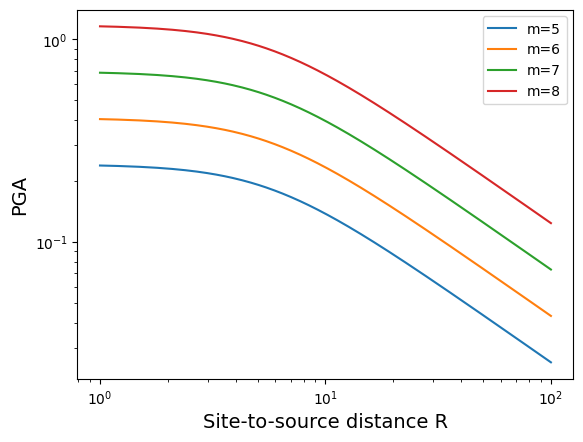

In [67]:
b1 = -0.117
b2 = 0.527
b3 = 0.00
b5 = -0.778
bV = -0.371
VS = 310
VA = 1396
h = 5.57

b1_hat = b1 + bV*np.log(VS/VA)

m = np.linspace(2, 10, 1000)

pga = lambda m, r: b1_hat + b2*(m-6) + b3*(m-6)**2 + b5*np.log(np.sqrt(r**2 + h**2))

r = np.linspace(1,100,1000)

plt.figure()
for k in range(5, 9):
    plt.plot(r, np.exp(pga(m=k, r=r)), label=f'm={k}')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Site-to-source distance R', fontsize=14)
plt.ylabel('PGA', fontsize=14)
plt.legend()
plt.show()

In [65]:
b1 + bV*np.log(VS/VA)

0.4412785687477997

In [27]:
S.get_shocks(lambda_t=S.lambda_t, beta_m=S.beta_m, m_min=S.m_min, m_max=S.m_max, max_timesteps=S.max_timesteps)

(array([10, 35]), array([5.10395148, 5.08208351]))

In [8]:
(1-np.exp(-S.beta_m*(S.m_max-S-S.m_min)))

TypeError: unsupported operand type(s) for -: 'int' and 'Shock'

In [4]:
E = RoadEnvironment(**small_environment_dict)

In [10]:
myutils.write_graph(g=E.graph, filename='testgraph')

In [11]:
E2 = myutils.read_graph(filename='testgraph')

In [40]:
E3 = myutils.unpickle_graph(filename='temp_graph')

In [42]:
for e in E3.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x000001EB9F822540>, 0, {'road_segments': <environment.RoadEdge object at 0x000001EB9F9C1DE0>, 'volume': 200, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F822540>, 1, {'road_segments': <environment.RoadEdge object at 0x000001EB9F948040>, 'volume': 200, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F822540>, 2, {'road_segments': <environment.RoadEdge object at 0x000001EB9F9495A0>, 'volume': 200, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F822540>, 3, {'road_segments': <environment.RoadEdge object at 0x000001EB9F948520>, 'volume': 200, 'travel_time': 100.384})


In [18]:
for e in E.graph.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x000001EB9F821340>, 0, {'road_segments': <environment.RoadEdge object at 0x000001EB9F938910>, 'volume': 200, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F821340>, 1, {'road_segments': <environment.RoadEdge object at 0x000001EB9F938490>, 'volume': 200, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F821340>, 2, {'road_segments': <environment.RoadEdge object at 0x000001EB9F938940>, 'volume': 200, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F821340>, 3, {'road_segments': <environment.RoadEdge object at 0x000001EB9F93A050>, 'volume': 200, 'travel_time': 100.384})


In [22]:
d = E.graph.to_dict_dict()

In [28]:
G = nx.from_dict_of_dicts(d)

In [33]:
G.edges

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3)])

In [32]:
for e in G.adjacency():
    print(e)

(0, {1: {'road_segments': <environment.RoadEdge object at 0x000001EB9F938910>, 'volume': 200, 'travel_time': 100.384}, 2: {'road_segments': <environment.RoadEdge object at 0x000001EB9F938940>, 'volume': 200, 'travel_time': 100.384}})
(1, {0: {'road_segments': <environment.RoadEdge object at 0x000001EB9F938910>, 'volume': 200, 'travel_time': 100.384}, 3: {'road_segments': <environment.RoadEdge object at 0x000001EB9F938490>, 'volume': 200, 'travel_time': 100.384}})
(2, {0: {'road_segments': <environment.RoadEdge object at 0x000001EB9F938940>, 'volume': 200, 'travel_time': 100.384}, 3: {'road_segments': <environment.RoadEdge object at 0x000001EB9F93A050>, 'volume': 200, 'travel_time': 100.384}})
(3, {1: {'road_segments': <environment.RoadEdge object at 0x000001EB9F938490>, 'volume': 200, 'travel_time': 100.384}, 2: {'road_segments': <environment.RoadEdge object at 0x000001EB9F93A050>, 'volume': 200, 'travel_time': 100.384}})


In [26]:
d[0][1]['road_segments']

In [16]:
for e in E2.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x000001EB9F822240>, 0, {'volume': 200.0, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F822240>, 1, {'volume': 200.0, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F822240>, 2, {'volume': 200.0, 'travel_time': 100.384})
igraph.Edge(<igraph.Graph object at 0x000001EB9F822240>, 3, {'volume': 200.0, 'travel_time': 100.384})


In [ ]:
nx.draw(G=P)

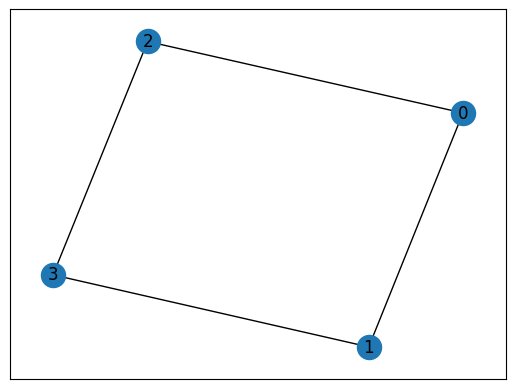

In [47]:
nx.draw_networkx(P)

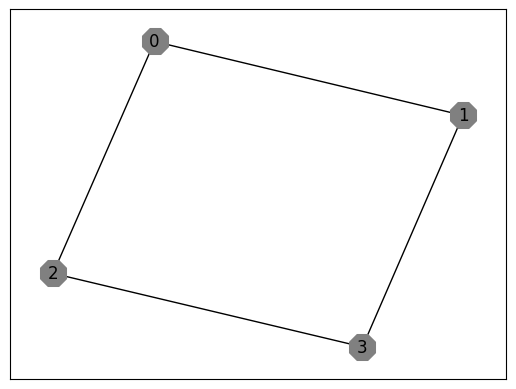

In [49]:
vis.graph_structure(g=P)

In [52]:
layout_dict = {'shell': nx.shell_layout, 'planar': nx.planar_layout, 'kamada_kawai': nx.kamada_kawai_layout}

In [53]:
layout_dict['planar'](P)

{0: array([-1.        , -0.33333333]),
 1: array([ 0.77777778, -0.33333333]),
 2: array([-0.11111111,  0.55555556]),
 3: array([0.33333333, 0.11111111])}

In [90]:
a = [n for n in P.nodes()]

In [92]:
type(a[0])

int

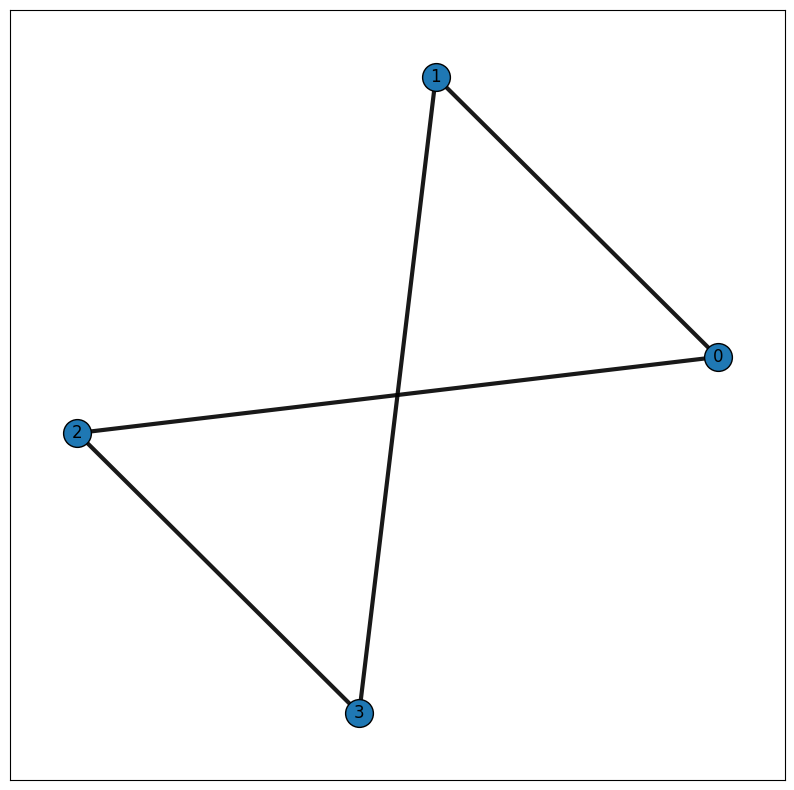

In [105]:
vis.graph_structure(g=P, layout='kamada_kawai')

In [108]:
a = [e for e in P.edges()]

In [126]:
P.nodes

NodeView((0, 1, 2, 3))

In [162]:
for e in P.adjacency():
    for v in e[1].values():
        print([s.state for s in v['road_segments'].segments])
        #for s in e[1][k]['road_segments'].segments:
        #    print(s.number_of_states)
        #    break

[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]


In [202]:
for k in P.edges():
    print(P.edges[k])
    print(k['road_segments'])

{'road_segments': <environment.RoadEdge object at 0x000001EB9F938910>, 'volume': 200, 'travel_time': 100.384, '_igraph_index': 0}


TypeError: tuple indices must be integers or slices, not str

In [197]:
P.edges[0,2]['road_segments'].segments

In [242]:
for e in P.edges():
    for s in P.edges[e]['road_segments'].segments:
        s.state = np.random.randint(4) 
        print(s.state)

1
0
3
1
2
1
2
1


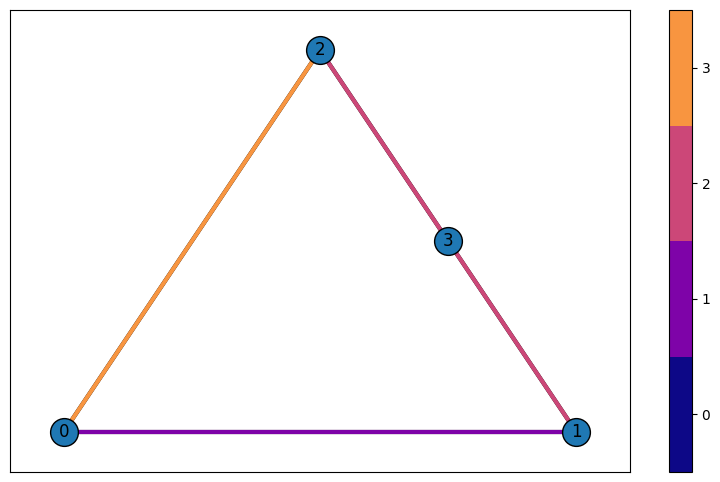

(<Figure size 1000x600 with 2 Axes>, <Axes: >, None)

In [259]:
vis.graph_states(g=P, use_cmap=True)

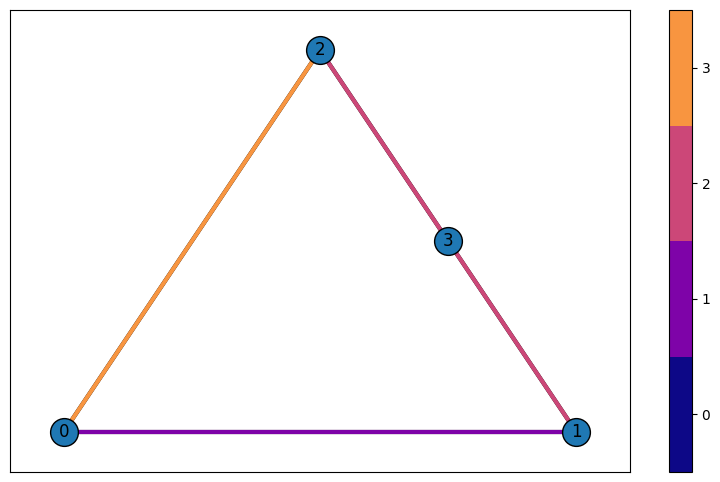

In [285]:
vis.graph_states(g=E.graph, use_cmap=True)

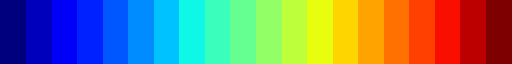

In [232]:
cmap

In [190]:
len(iter([0,0,0]))

TypeError: object of type 'list_iterator' has no len()

In [153]:
next(iter(next(iter(P.adjacency()))[1].values()))['road_segments'].segments[0].number_of_states

4

In [86]:
standard_plot = {'vertex_size': 30, 'vertex_color': 'red', 'vertex_shape': 'circle', 'vertex_label_size': 10, 
                 'edge_width': 4, 'edge_color': 'black',
                 'autocurve': True, 'layout': 'auto', 'bbox': (0, 0, 800, 800)}

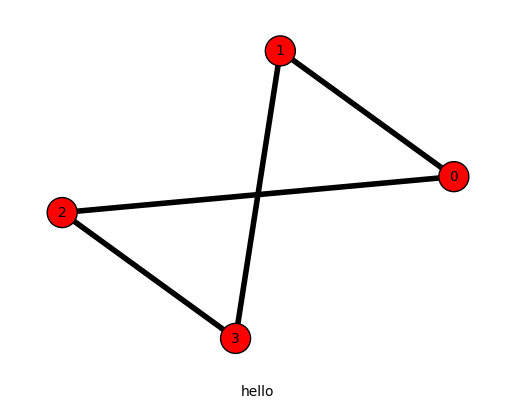

In [111]:
fig, ax = plt.subplots()
p = ig.plot(obj=E.graph, vertex_label=[k for k in range(4)], **standard_plot, target=ax)
plt.xlabel('hello')
plt.show()

In [116]:
for e in E.graph.es:
    print(max(s.state for s in e['road_segments'].segments))

0
0
0
0


In [124]:
for e in E.graph.es:
    for s in e['road_segments'].segments:
        s.state = np.random.randint(0,4)

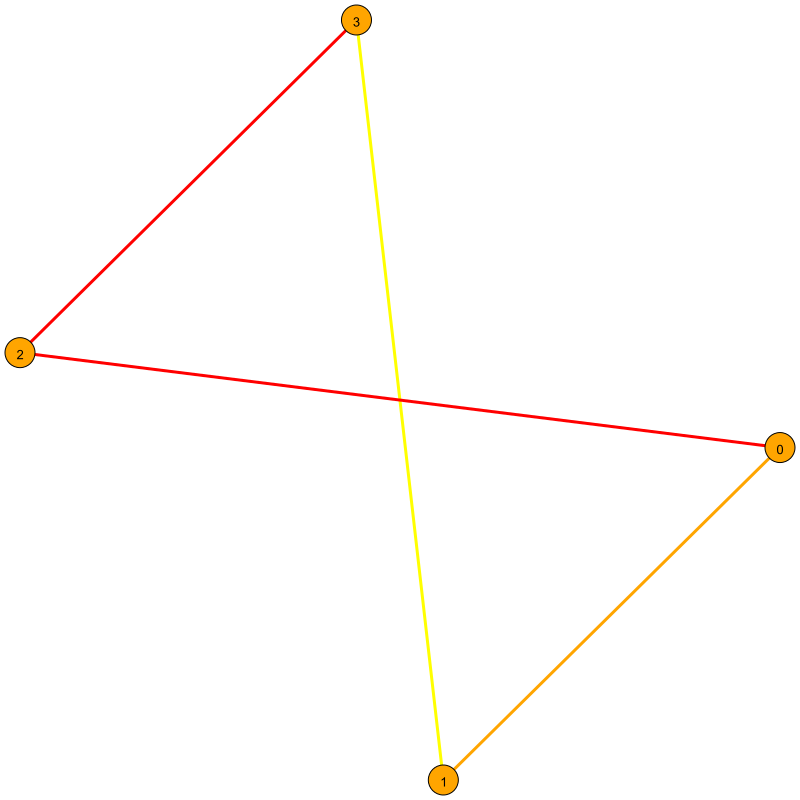

In [125]:
vis.graph_states(g = E.graph)

In [107]:
ig.plot(obj=E.graph, vertex_label=[k for k in range(4)], **standard_plot, target=ax)
plt.show()

In [117]:
p = vis.graph_structure(g=E.graph, save=True, filename='hello')

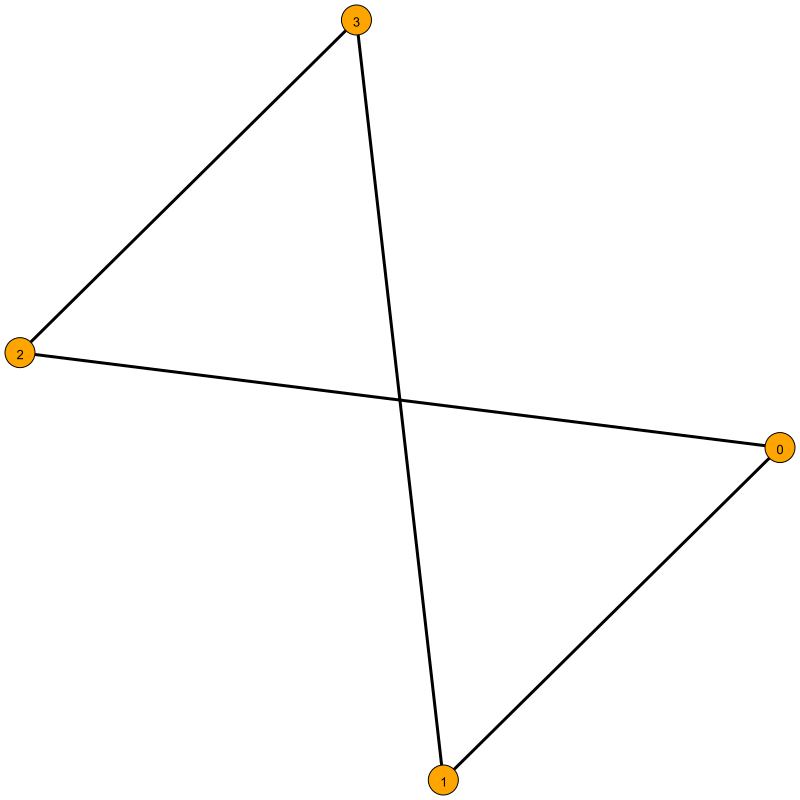

In [118]:
p

In [94]:
type(p)

igraph.drawing.cairo.plot.CairoPlot

In [97]:
p.save('myfile2')

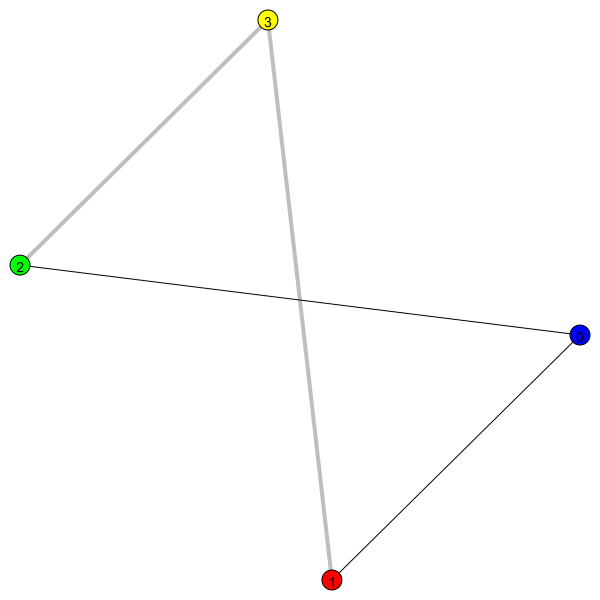

In [6]:
ig.plot(E.graph,
        vertex_size=20,
        vertex_color=['blue', 'red', 'green', 'yellow'],
        vertex_label=[k for k in range(E.num_vertices)],
        edge_width=[1, 4],
        edge_color=['black', 'grey'],
        )

In [74]:
for e in E.graph.vs:
    print(e)
    print(e.__dir__(), e.index)

igraph.Vertex(<igraph.Graph object at 0x00000194D5783A40>, 0, {})
['__repr__', '__hash__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__init__', '__len__', '__getitem__', '__setitem__', '__delitem__', 'attributes', 'attribute_names', 'update_attributes', 'all_edges', 'in_edges', 'out_edges', 'betweenness', 'closeness', 'constraint', 'degree', 'delete', 'distances', 'diversity', 'eccentricity', 'get_shortest_paths', 'incident', 'indegree', 'is_minimal_separator', 'is_separator', 'neighbors', 'outdegree', 'pagerank', 'predecessors', 'personalized_pagerank', 'strength', 'successors', 'index', 'graph', '__doc__', '__module__', '__new__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__'] 0
igraph.Vertex(<igraph.Graph object at 0x00000194D5783A40>, 1, {})
['__repr__', '__hash__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '_

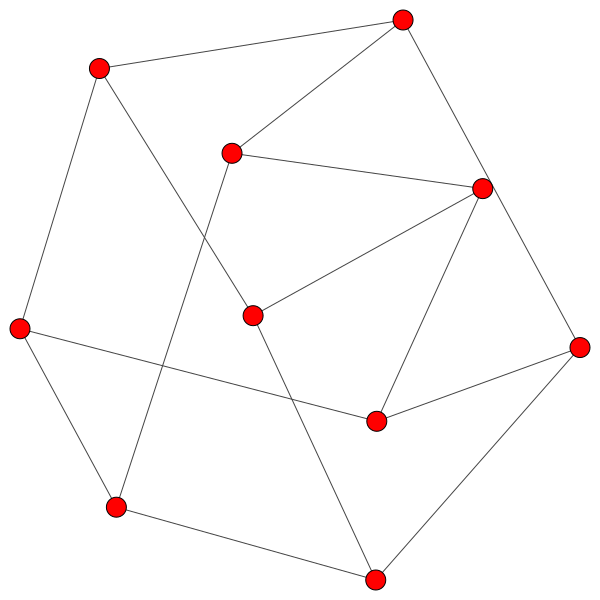

In [83]:
g = ig.Graph.Famous("petersen")
ig.plot(g)